  NAME: SOHEL MUKADAM


TASK 1: PREDICTION USING SUPERVISED ML



Problem Statement: Predict the percentage of a student based on the no. of study hours. What will be predicted score if a student studies for 9.25 hrs/day.
Python has been used to predict the scores.

-> Import the required libraries



In [66]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

-> Import the dataset and Explore data

In [67]:
#Importing dataset
data = pd.read_csv('http://bit.ly/w-data')

In [68]:
#Top Values
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [69]:
#Bottom Values
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [70]:
#Statistical properties of the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [71]:
#Shape of the dataset
data.shape

(25, 2)

In [72]:
#Data information
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [73]:
#Unique Values
data.nunique()

Hours     23
Scores    23
dtype: int64

In [74]:
#Relationship between independent variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


-> Visualize the data

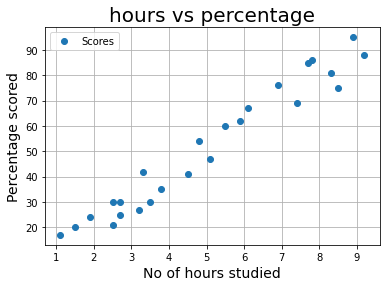

In [75]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('hours vs percentage', size=20)
plt.xlabel('No of hours studied', size=14)
plt.ylabel('Percentage scored', size=14)
plt.grid()

-> Preparing the data

In [76]:
# extracting the values
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [77]:
#split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [78]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [79]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [80]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [81]:
y_test

array([20, 27, 69, 30, 62])

-> Training the data

In [82]:
#using LinearRegression() from Scikit-Learn library.
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
model.coef_

array([9.77580339])

In [84]:
model.intercept_

2.48367340537321

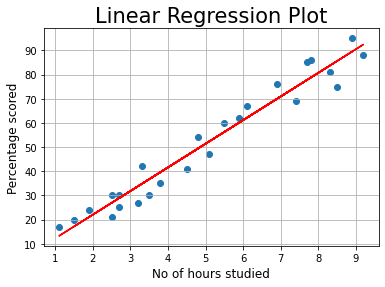

In [85]:
# plotting the linear regression line
prediction = model.coef_*x + model.intercept_
plt.scatter(x,y)
plt.plot(x, prediction, c='r')
plt.title('Linear Regression Plot', size=21)
plt.ylabel('Percentage scored', size=12)
plt.xlabel('No of hours studied', size=12)
plt.grid(True)
plt.show()

-> Testing the data

In [86]:
#Predicting the values
y_pred = model.predict(x_test)
y_pred

array([17.14737849, 33.76624426, 74.8246185 , 26.92318188, 60.16091341])

In [87]:
#actual score vs predicted score based on no of hours studied
df = pd.DataFrame({'No of study Hours': x_test.flatten(), 'Actual Scores': y_test, 'Predicted Scores': y_pred})
df

,No of study Hours,Actual Scores,Predicted Scores
0,1.5,20,17.147378
1,3.2,27,33.766244
2,7.4,69,74.824618
3,2.5,30,26.923182
4,5.9,62,60.160913


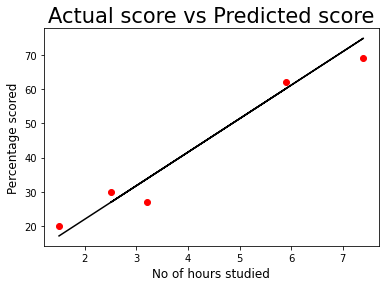

In [88]:
# visualizing the predicted values vs the actual values
plt.scatter(x=x_test, y=y_test, color='red')
plt.plot(x_test, y_pred, color='Black')
plt.title('Actual score vs Predicted score', size=21)
plt.ylabel('Percentage scored', size=12)
plt.xlabel('No of hours studied', size=12)
plt.show()

In [89]:
#The accuracy of the model
mean_err = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error of above model is', mean_err)

Mean Absolute Error of above model is 4.071877793635605


In [90]:
#The percentage of variation of the model
r2 = r2_score(y_test, y_pred)
print('R-Squared value for above model is', r2)

R-Squared value for above model is 0.9491748734859172


-> Prediction

In [91]:
#What will be predicted score if a student studies for 9.25 hrs/day?
predict= float(input('Enter no. of Hours : ' ))
predict1 = np.array(predict).reshape(1,1)
print(f'Predicted Score is : {model.predict(predict1)[0]}')

Enter no. of Hours : 9.5
Predicted Score is : 95.35380561785415
